<a href="https://colab.research.google.com/github/RicardoVilla0/MachineLearning/blob/main/Unidad%203/proyecto/ArbolDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Importamos librerias necesarias para Árboles de decisión
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve


In [2]:
prestamos_df = pd.read_csv('prestamos_ok.csv')
prestamos_df.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year,repaid,loan_term_year,purpose_code,home_ownership_code,grade_code,addr_state_code
0,0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,Cash,N,NaN,2011,1,3,11,4,2,2
1,1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,Cash,N,NaN,2011,1,3,9,4,2,0
2,2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,...,Cash,N,NaN,2011,1,3,0,4,4,0
3,3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,...,Cash,N,NaN,2011,0,5,11,3,5,0
4,4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,...,Cash,N,NaN,2011,0,5,9,4,1,5


In [3]:
X = prestamos_df[['recoveries', 'collection_recovery_fee', 'total_rec_prncp',
                  'total_pymnt', 'total_pymnt_inv',
                  'last_pymnt_amnt', 'loan_amnt']]

# Variable objetivo o variable a predecir
y = prestamos_df["repaid"]

In [5]:
# Dividimos el dataFrame
# stratify es para que mantenga la misma proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.3, stratify=y )
# verificamos la cantidad de registros asignados al dataframe de entrenamiento
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13935, 7), (5973, 7), (13935,), (5973,))

In [6]:
# Crear modelo con balanceo de clases y max_depth (profundidad del árbol)
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=7, class_weight='balanced', random_state=42, )

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar fase de prueba
y_pred3 = tree_model.predict(X_test)

# Evaluar el modelo de prueba
print("\nReporte de métricas del clasificador de Arboles de Decisión: \n",
      classification_report(y_test, y_pred3, target_names=["No Pagado", "Pagado"]))

print("\n Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred3))


Reporte de métricas del clasificador de Arboles de Decisión: 
               precision    recall  f1-score   support

   No Pagado       1.00      1.00      1.00       883
      Pagado       1.00      1.00      1.00      5090

    accuracy                           1.00      5973
   macro avg       1.00      1.00      1.00      5973
weighted avg       1.00      1.00      1.00      5973


 Matriz de Confusión:
[[ 879    4]
 [   0 5090]]


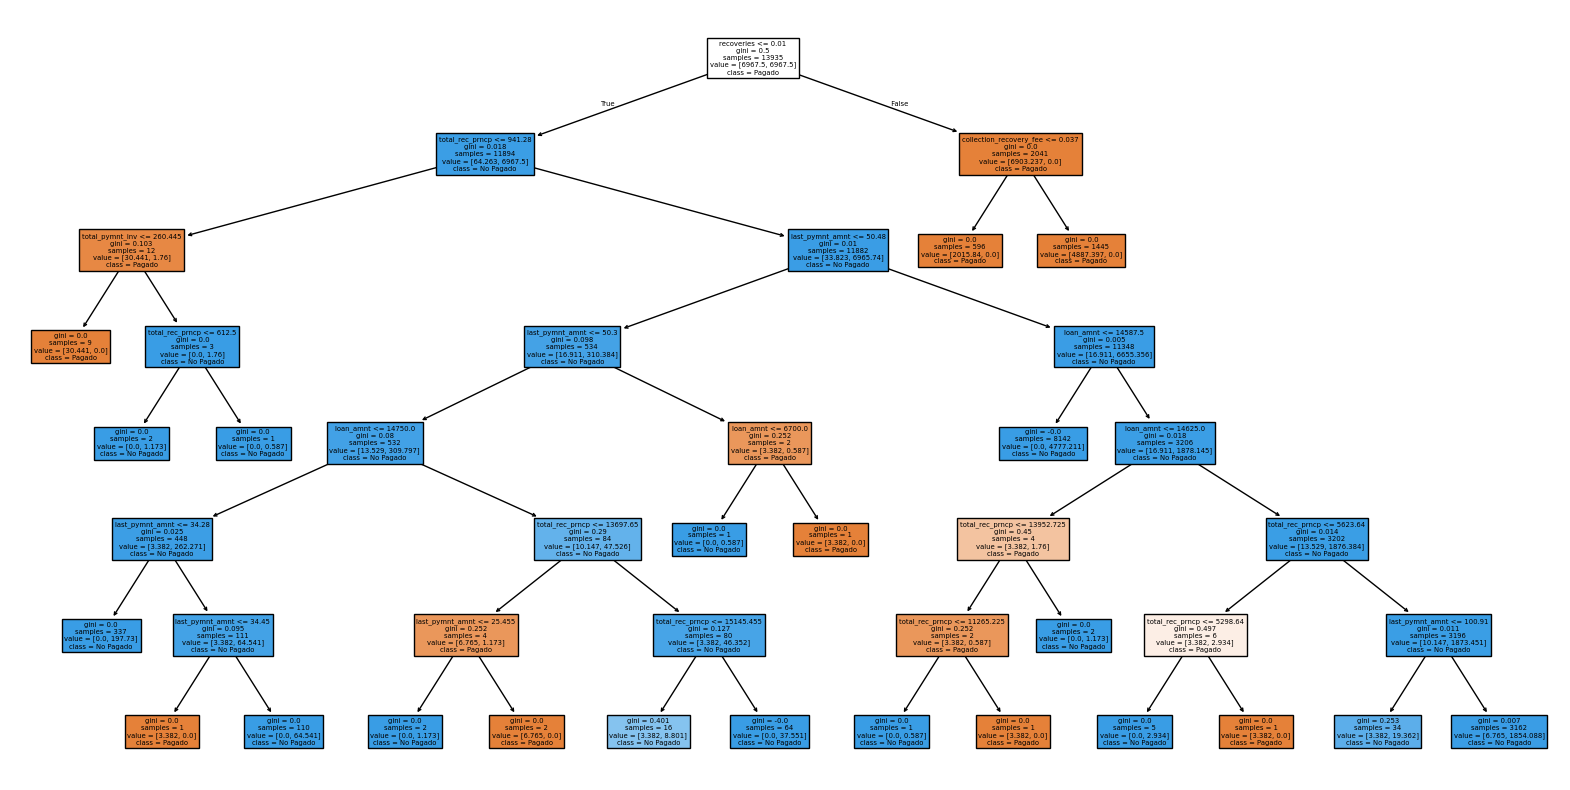

In [11]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Define the feature names from the training data
model_columns = X.columns.tolist()

# Graficar el árbol
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=model_columns, class_names=['Pagado', 'No Pagado'], filled=True)
plt.show()